In [2]:
import time
import datetime
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
filepath="/content/Wangboman.csv"
df = pd.read_csv(filepath)
df.columns = ['Time','Answerer','VR world','Topic','Collaborators(Main&aux)','StartTime','EndTime','Valence','Arousal','Dominance','Excite-Not Excite','Serious-Not Serious','Smooth-Not Smooth','Bright-Not Bright','Eminent-Not Eminent','Close-Not Close','Equal-Not Equal']
print(df)
print(type(df))

                          Time   Answerer       VR world     Topic  \
0  2022/07/19 1:47:16 午後 GMT+9  wangboman     relax room     relax   
1  2022/07/19 2:02:36 午後 GMT+9  wangboman     relax room   vr game   
2  2022/07/19 2:08:48 午後 GMT+9  wangboman         forest     relax   
3  2022/07/19 2:14:37 午後 GMT+9  wangboman         forest        vr   
4  2022/07/19 2:22:04 午後 GMT+9  wangboman   blood memory      stay   
5  2022/07/19 2:28:02 午後 GMT+9  wangboman   blood memory  life for   
6  2022/07/19 2:35:01 午後 GMT+9  wangboman   ghost memory      stay   
7  2022/07/19 2:45:10 午後 GMT+9  wangboman  ghost stories      play   

  Collaborators(Main&aux) StartTime   EndTime  Valence  Arousal  Dominance  \
0               wangboman  13:41:11  13:44:11        8        5          3   
1          wangboman,wang  13:57:00  14:00:00        8        6          5   
2               wangboman  14:04:30  14:07:00        8        2          7   
3           wangboman,liu  14:10:00  14:12:20        8   

In [4]:
filepath="/content/gaze0.csv"
gaze_df = pd.read_csv(filepath)

gaze_df_mean = gaze_df.mean().to_frame()
#type(rv_df_mean)
gaze_df_mean = gaze_df_mean.T
#print(rv_df_mean.T)
#rv_df_mean['HRV_MeanNN']
gaze_df_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,index,Position_x,Position_y,Position_z,EulerAngles_x,EulerAngles_y,EulerAngles_z,pupilDiameterLeft,pupilPositionLeft_x,pupilPositionLeft_y,...,Mouth_Upper_Inside,Mouth_Lower_Overlay,Mouth_Upper_Overlay,Cheek_Suck,Mouth_LowerRight_Down,Mouth_LowerLeft_Down,Mouth_UpperRight_Up,Mouth_UpperLeft_Up,Mouth_Philtrum_Right,Mouth_Philtrum_Left
0,8891.0,0.025117,1.626274,-0.19242,-8.349224,-3.966008,-2.216761,4.161864,0.420477,0.477904,...,0.247154,0.152759,0.003987,0.612881,15.810394,15.108825,3.603648,2.385735,0.0,0.005598


In [6]:
def savecsv(filepath,data):
    data.to_csv(filepath,index=0)
    print("saved to ",filepath)
    print("-"*50)  

In [10]:
frames = []
for i in range(8):
  #print(i)
  filepath="/content/gaze"+str(i)+".csv"
  rv_df = pd.read_csv(filepath)
  rv_df_mean = rv_df.mean().to_frame().T
  frames.append(rv_df_mean)
  
  #print(result.iloc[1])

result = pd.concat(frames,axis=0)

result = result.reset_index()

drop_column=['index','level_0']
result = result.drop(drop_column, axis=1)
#print(result)

result = pd.concat([result,df[['Valence','Arousal','Dominance','Excite-Not Excite','Serious-Not Serious','Smooth-Not Smooth','Bright-Not Bright','Eminent-Not Eminent','Close-Not Close','Equal-Not Equal']]],axis=1)
print(result)
#

save_filePath="/content/"+ "res.csv"
savecsv(save_filePath,result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


   Position_x  Position_y  Position_z  EulerAngles_x  EulerAngles_y  \
0    0.025117    1.626274   -0.192420      -8.349224      -3.966008   
1    0.034546    1.547998   -0.282250     -19.670036      -1.397874   
2    0.049824    1.626947   -0.274374     -15.233493      -4.784511   
3    0.046484    1.561099   -0.229989     -15.815567       2.508842   
4    0.042611    1.603978   -0.170390     -12.413340      -2.026972   
5    0.099830    1.456294   -0.234014     -17.260577      -0.692126   
6    0.082432    1.558969   -0.230740     -14.433028      -1.054565   
7    0.026467    1.575203   -0.163715     -20.361078      -1.311071   

   EulerAngles_z  pupilDiameterLeft  pupilPositionLeft_x  pupilPositionLeft_y  \
0      -2.216761           4.161864             0.420477             0.477904   
1      -2.729175           4.524293             0.462132             0.495282   
2      -3.872571           3.725381             0.453601             0.447711   
3      -6.698953           3.730839 

In [9]:
result.corr()

,level_0,Position_x,Position_y,Position_z,EulerAngles_x,EulerAngles_y,EulerAngles_z,pupilDiameterLeft,pupilPositionLeft_x,pupilPositionLeft_y,...,Valence,Arousal,Dominance,Excite-Not Excite,Serious-Not Serious,Smooth-Not Smooth,Bright-Not Bright,Eminent-Not Eminent,Close-Not Close,Equal-Not Equal
level_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position_x,NaN,1.000000,-0.721416,-0.291032,-0.102085,0.244812,-0.386819,0.089184,0.101790,0.242006,...,-0.510355,-0.230004,-0.215058,0.076641,-0.319862,0.239979,0.302912,0.302912,0.239979,-0.036698
Position_y,NaN,-0.721416,1.000000,0.211889,0.520341,-0.562240,0.302975,-0.433796,-0.187480,-0.577105,...,0.395337,0.036486,0.253090,0.167783,0.266456,0.168737,-0.105850,-0.105850,0.168737,0.669088
Position_z,NaN,-0.291032,0.211889,1.000000,0.282530,0.045485,-0.079542,0.000467,-0.538704,-0.367234,...,-0.507098,0.239700,-0.757129,0.681363,-0.491088,0.474582,0.507239,0.507239,0.474582,0.127497
EulerAngles_x,NaN,-0.102085,0.520341,0.282530,1.000000,-0.393550,-0.127696,-0.542216,-0.555303,-0.435246,...,0.162249,-0.278791,-0.076556,0.161908,0.103705,0.364817,0.077671,0.077671,0.364817,0.778543
EulerAngles_y,NaN,0.244812,-0.562240,0.045485,-0.393550,1.000000,-0.402443,0.083119,0.140881,0.313191,...,-0.158720,0.437307,-0.165046,-0.307294,0.266844,-0.600570,-0.411793,-0.411793,-0.600570,-0.662844
EulerAngles_z,NaN,-0.386819,0.302975,-0.079542,-0.127696,-0.402443,1.000000,0.691442,0.656692,0.339864,...,0.163789,0.544200,0.045199,0.113998,-0.071419,0.094275,0.083804,0.083804,0.094275,0.062288
pupilDiameterLeft,NaN,0.089184,-0.433796,0.000467,-0.542216,0.083119,0.691442,1.000000,0.654218,0.657024,...,-0.288653,0.564289,-0.327064,0.137934,-0.390321,0.045395,0.271312,0.271312,0.045395,-0.473372
pupilPositionLeft_x,NaN,0.101790,-0.187480,-0.538704,-0.555303,0.140881,0.656692,0.654218,1.000000,0.686124,...,0.176593,0.543326,0.329272,-0.170859,0.110375,-0.293147,-0.188105,-0.188105,-0.293147,-0.351652
pupilPositionLeft_y,NaN,0.242006,-0.577105,-0.367234,-0.435246,0.313191,0.339864,0.657024,0.686124,1.000000,...,0.220268,0.221850,0.220684,-0.162773,-0.106473,-0.300156,-0.050181,-0.050181,-0.300156,-0.670461


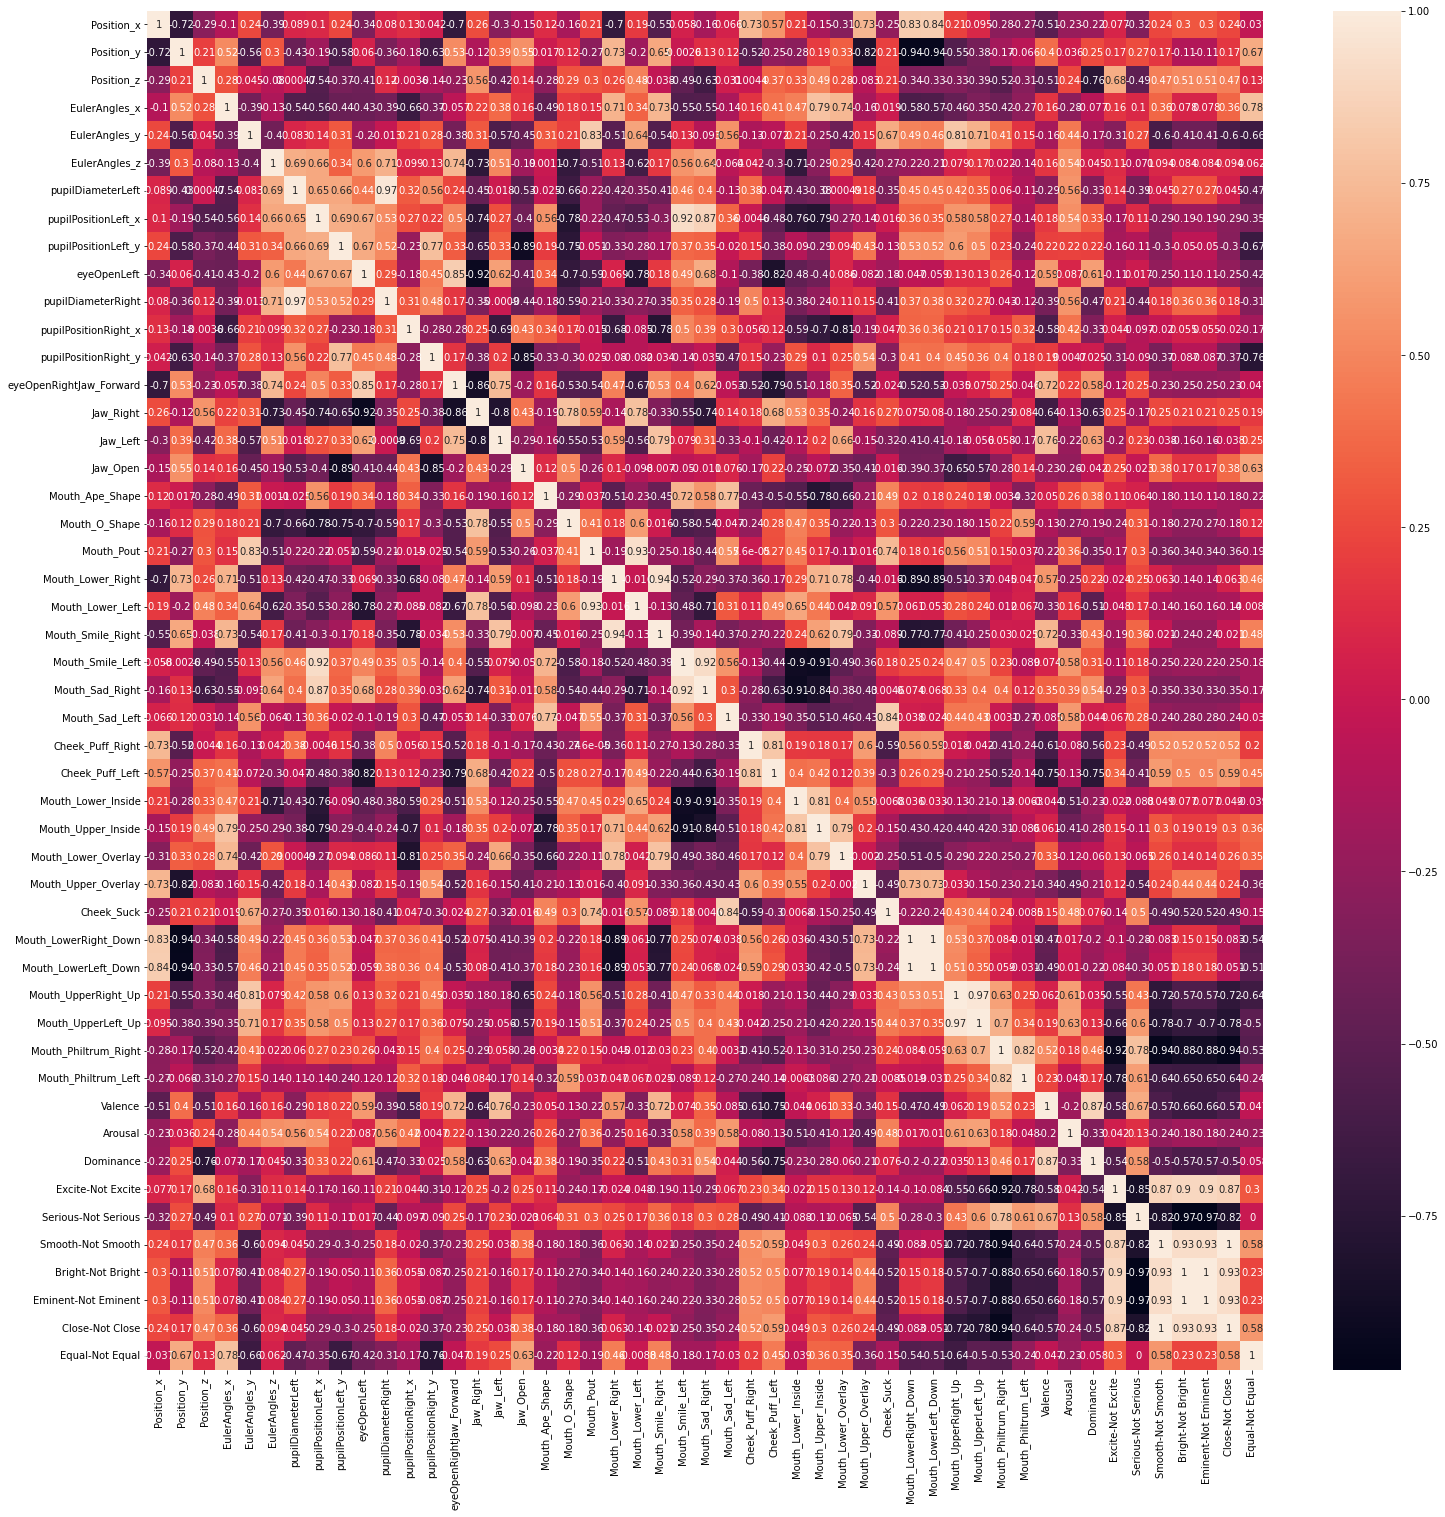

In [12]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(result.corr(),annot=True)